# 3 Directed Acyclic Graphs

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 3.1.5 Discrimination and collider bias

In [10]:
# compare to collider_discrimination

population_size = 10000

# create a dataframe for the observations
df = pd.DataFrame(index = range(population_size))

# Indicator variable for female
df['female'] = np.random.binomial(1, .5, population_size)

# Innate ability is independent of gender
df['ability'] = np.random.normal(size = population_size)

# All women experience discrimination 
df['discrimination'] = df['female']

# Data generating process
df['occupation'] = 1 + 2*df.ability + 0*df.female - 2*df.discrimination + np.random.normal(size = population_size)
df['wage'] = 1 - 1*df.discrimination + df.occupation + 2*df.ability + np.random.normal(size = population_size)

###### Biased Unconditional

In [16]:
X = df[['female']]
y = df.wage

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1313.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):          2.84e-270
Time:                        10:54:37   Log-Likelihood:                -28594.
No. Observations:               10000   AIC:                         5.719e+04
Df Residuals:                    9998   BIC:                         5.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0447      0.060     34.002      0.0

###### Biased Conditional


In [14]:
X = df[['female', 'occupation']]
y = df.wage

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 4.983e+04
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:51:19   Log-Likelihood:                -17236.
No. Observations:               10000   AIC:                         3.448e+04
Df Residuals:                    9997   BIC:                         3.450e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2157      0.020     10.633      0.0

###### Unbiased Conditional

In [15]:
X = df[['female', 'occupation', 'ability']]
y = df.wage

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 6.283e+04
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:51:47   Log-Likelihood:                -14269.
No. Observations:               10000   AIC:                         2.855e+04
Df Residuals:                    9996   BIC:                         2.857e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0118      0.017     57.875      0.0

## 3.1.6 Sample selection and collider bias

In [27]:
# compare to moviestar

obs = 2500
df = pd.DataFrame(index = range(obs))

df['beauty'] = np.random.normal(size = obs)
df['talent'] = np.random.normal(size = obs)

# create the collider variable
df['score'] = df.beauty + df.talent
df['star'] = df.score >= df.score.quantile(.85)

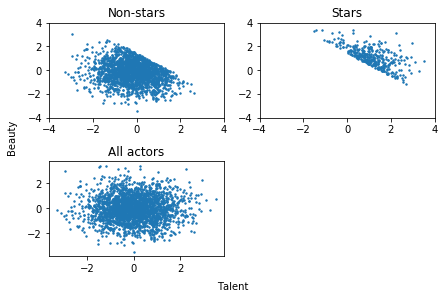

In [51]:
# Make scatter plots

stars = df[df.star == True]
nonstars = df[df.star == False]

fig = plt.figure()

# Non-stars
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(nonstars.talent, nonstars.beauty, s = 2)
ax1.set_title("Non-stars")

# Stars
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(stars.talent, stars.beauty, s = 2)
ax2.set_title('Stars')

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df.talent, df.beauty, s = 2)
ax3.set_title("All actors")

# Set axes limits
for ax_ in ax0, ax1, ax2:
    ax_.set_xlim([-4,4])
    ax_.set_ylim([-4,4])

# Label axes for entire grid
fig.text(0.5, -.01, 'Talent', ha='center', va='center')
fig.text(-0.01, 0.51, 'Beauty', ha='center', va='center', rotation='vertical')
    
    
fig.tight_layout()